# Delaware State Employee Purchase Card Trends

## Societal Problem

Purchase Cards, commonly referred to as P-Cards, offer government organizations and employees a quick and adaptable way to get goods and equipment necessary to do their jobs. However, just like any expedited process, the increase of accessibility also comes with a decrease in security and oversight. In the case of the Delaware State Government this means giving state employees the ability to spend taxpayer money without prior approval.

## Background

The Delaware State Government has partnered with JP Morgan Chase in order to provide Purchase Cards to its departments. These cards are distributed to department employees as each department sees fit. While the names on the cards are that of the employees who hold them, the cards themselves are backed by the State's money. In order to ensure the proper use of the P-Cards Delaware often partners with independent contractors to perform audits of the departments' use of P-Card funds. For the majority of departments that are fully state controlled the audit system works well, but in more unique cases where P-Cards are used by institutions only partially controlled by the State, the audits can become causes of turmoil. One notable example of this would be the University of Delaware, which uses the P-Card system not complying with an audit request from the State. 

## Research Questions
* Are there seasonal and yearly fluctuations or trends in P-Card spending?
* What categories do P-Card purchases fall under? What are the general trends of purchases and did COVID-19 have an impact on what was purchased?
* How much money is typically spent per purchase? Do different departments have different means or trends? Is it consistent throughout?  Did COVID-19 also affect which department are making the most purchases?

## Research Justification

The essence of this research's justification is the simple fact that the public deserves transparency in how their tax money is being spent by the government. While P-Card spending is often seen as insignificant and is not discussed in political reelection campaigns or congressional budget proposals, P-Card spending still averages close to 70 million dollars a year. Secondarily this money is also mostly spent by unelected officials. People who are not specifically trusted to their positions by the tax payers whose money they use, but rather by government bureaucracies. This even furthers the need for strict oversight and transparency to the tax payers.

## Ethical Considerations

The ethical considerations of P-Card spending center around 3 stakeholder group, those being the government agencies, tax payers, and the merchants that ultimate receive the money from P-Cards. The dynamic and necessity for transparency between the government agencies and tax payers is elaborated upon above, another relationship that should be considered is that between the government agencies and the merchants they choose to support. In most cases of P-Card spending, the choice of which merchant to support comes down to the single employee responsible for their government issued P-Card. This leaves the ethical decision of what merchant should be supported with government money down to a single individual. My goal of this analysis is to provide a clear and concise picture of P-Card spending for a public audience, but it is also important to keep in mind the other stakeholder relationships at play here as well.

## General Data Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("State_Employee_Credit_Card_Transactions.csv");

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040394 entries, 0 to 1040393
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   FISCAL_YEAR      1040394 non-null  int64  
 1   FISCAL_PERIOD    1040394 non-null  int64  
 2   DEPT_NAME        1040394 non-null  object 
 3   DIV_NAME         1040394 non-null  object 
 4   MERCHANT         1040394 non-null  object 
 5   CAT_DESCR        1040394 non-null  object 
 6   TRANS_DT         1040394 non-null  object 
 7   MERCHANDISE_AMT  1040394 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 63.5+ MB


In [3]:
df["FISCAL_YEAR"].unique()

array([2016, 2017, 2018, 2019, 2020, 2021])

In [4]:
len(df["DEPT_NAME"].unique())

73

In [3]:
df["MERCHANDISE_AMT"].sum()/6

69106406.04166667

The data set I chose to work with is an extensive list of P-Card purchases made over a 6 year period from 2016 to 2021. The set is collected by the Delaware Department of Finance and is available for public access [here](https://data.delaware.gov/Government-and-Finance/State-Employee-Credit-Card-Transactions/nurt-5rqw). Each row of the data set mimics a receipt of a purchase, providing information on the Department and division that made the purchase, the name of the merchant, a description of the what was bought, as well as the date and amount spent on the purchase. In total the data encompasses 73 unique department and their P-Card purchases which amount to \$414,638,466 over a span of 6 years.

## Time Analysis of Purchases

The intent of this section is to answer the first research question proposed: __Are there seasonal and yearly  fluctuations or trends in P-Card spending?__. In order to dissect this question I have broken down the data set into several visualizations that will help to show how P-Card spending has evolved over time.

### Monthly Analysis

The first of two time based analysis will focus on monthly periods of purchase. The intent of this section is to answer the first half of the above stated time related research questions. Any seasonal fluctuations should present themselves in the following analysis.

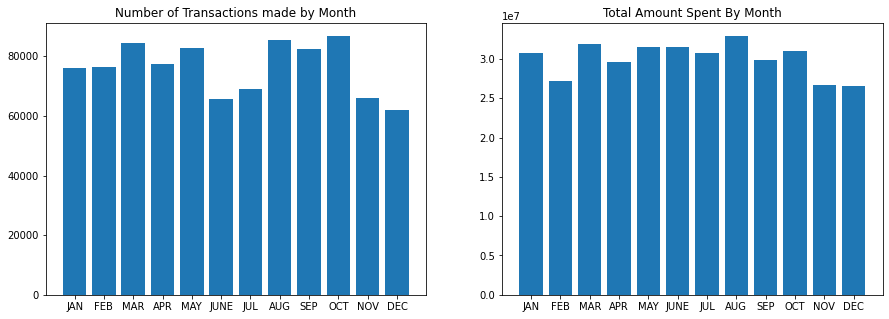

In [6]:
df["TRANS_DT"] = df["TRANS_DT"].astype("datetime64") #Converting TRANS_DT column into date format

#Filtering out transactions made in 2015 and 2021 since neither of those are complete years in the dataset
byMonth = df[(df['TRANS_DT'].dt.year != 2015)]
byMonth = byMonth[(byMonth['TRANS_DT'].dt.year != 2021)]

months = ["JAN", "FEB", "MAR", "APR","MAY","JUNE","JUL","AUG","SEP","OCT","NOV","DEC"]

fig1, (count_bar, cost_bar) = plt.subplots(1,2, figsize = (15,5))
#Number of Transactions made bar chart
count_bar.bar(height = byMonth.groupby(byMonth["TRANS_DT"].dt.month).count()["TRANS_DT"],
        x = months )
count_bar.title.set_text("Number of Transactions made by Month")

#Amount Spent bar chart
cost_bar.bar(height=byMonth.groupby(byMonth["TRANS_DT"].dt.month).sum()["MERCHANDISE_AMT"], 
        x = months)
cost_bar.title.set_text("Total Amount Spent By Month")

plt.show()


The two bar graphs above breakdown both the total amount of transactions and total amount spent by month. The majority of the data seems to be insignificant with maybe only the lack of transactions made in June, July, November, and December being the only exceptions. Before these graphs were created transactions from both 2015 and 2021 were removed due to them being incomplete datasets and the possibility of them artificially skewing the data. Next the data will be broken down by percentages to further explore the the monthly purchase totals.

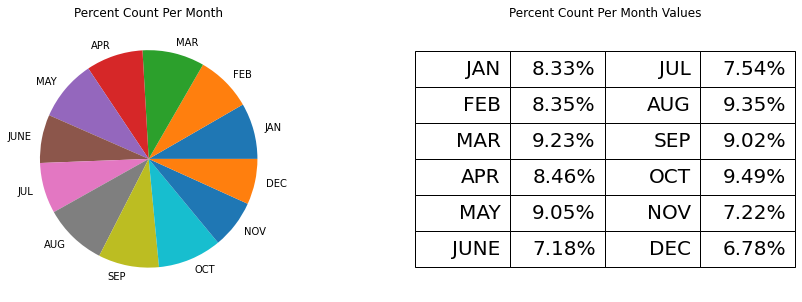

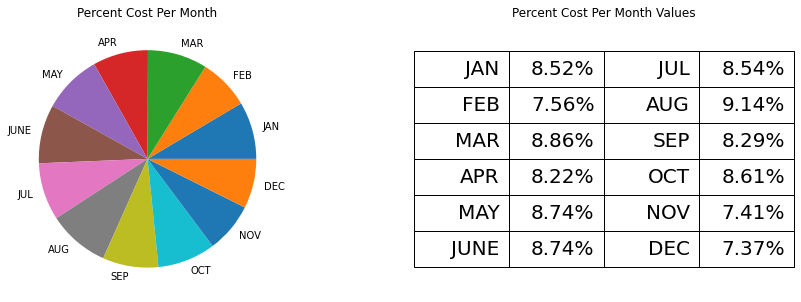

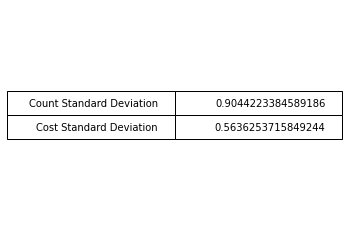

In [7]:
#Percentage Count Breakdown
pct_count = []
total = byMonth["MERCHANDISE_AMT"].count()
for elt in byMonth.groupby(byMonth["TRANS_DT"].dt.month).count()["MERCHANDISE_AMT"].values:
    pct_count.append(elt/total*100) 

fig, (count_pie, count_table) = plt.subplots(1,2, figsize = (15,5))

#Pie Chart
count_pie.pie(pct_count, labels = months)
count_pie.title.set_text("Percent Count Per Month")

#Table
count_data = []
for i in range(int((len(pct_count))/2)):
    count_data.append([months[i], str(round(pct_count[i],2))+"%", months[i+6], str(round(pct_count[i+6],2))+"%"])
count_table.axis("off")
count_table.title.set_text("Percent Count Per Month Values")
count_tab = count_table.table(count_data, loc = "center")
count_tab.set_fontsize(20)
count_tab.scale(1,3)
plt.show()

#Percentage Cost Breakdown
pct_cost = []
total = byMonth["MERCHANDISE_AMT"].sum()
for elt in byMonth.groupby(byMonth["TRANS_DT"].dt.month).sum()["MERCHANDISE_AMT"].values:
    pct_cost.append(elt/total*100) 

fig, (cost_pie, cost_table) = plt.subplots(1,2, figsize = (15,5))

#Pie Chart
cost_pie.pie(pct_cost, labels = months)
cost_pie.title.set_text("Percent Cost Per Month")

#Table
cost_data = []
for i in range(int((len(pct_cost))/2)):
    cost_data.append([months[i], str(round(pct_cost[i],2))+"%", months[i+6], str(round(pct_cost[i+6],2))+"%"])
cost_table.axis("off")
cost_table.title.set_text("Percent Cost Per Month Values")
cost_tab = cost_table.table(cost_data, loc = "center")
cost_tab.set_fontsize(20)
cost_tab.scale(1,3)
plt.show()

std_data = [["Count Standard Deviation", np.std(pct_count)],["Cost Standard Deviation", np.std(pct_cost)]]
std_table = plt.table(std_data, loc = "center")
plt.axis("off")
std_table.set_fontsize(20)
std_table.scale(1,2)
plt.show()

The pie charts and tables of this section intend to breakdown the monthly data numbers by percentages instead of totals. When broken down by percentage we can see that the data still seems to be pretty evenly distributed in both test cases and having a standard deviation of between .5 to .9 percent. Using the visualizations and standard deviations of each of the two distributions we can see that there is not much variation within each distribution. The final step to ensure there is no significant variation will be to use ANOVA tests to test the computer outputs against the expected even distribution of the 100% total over the 12 months.

In [8]:
#ANOVA TESTING
expected = [100/12]*12
count_result = stats.f_oneway(pct_count, expected)
cost_result = stats.f_oneway(pct_cost, expected)
print(f"Total Count P-Value: {count_result[1]}")
print(f"Total Cost P-Value: {cost_result[1]}")

Total Count P-Value: 1.0
Total Cost P-Value: 1.0


With both the Count and Cost P-Values equaling 1 we must fail to reject the null hypothesis. This means that there is no significant difference between both the total cost of purchases made and the total amount of purchases made when compared to an evenly distributed distribution. This testing along with the visualizations above lead me to my conclusion that there is are no significant seasonal fluctuations in P-Card spending.

### Yearly Analysis

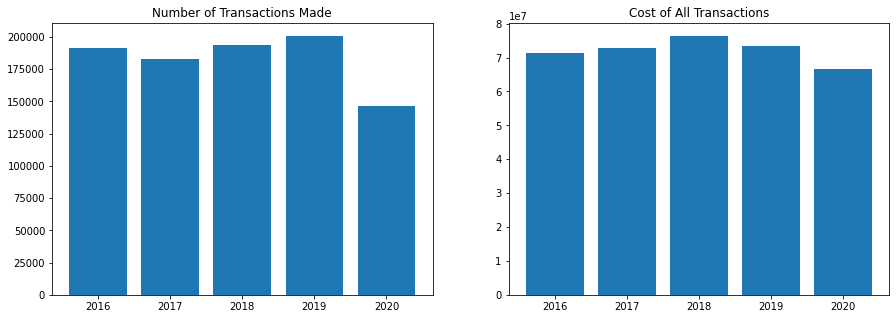

In [9]:

#Removing Incomplete Years
byYear = df[(df['TRANS_DT'].dt.year != 2015)]
byYear = byYear[(byYear['TRANS_DT'].dt.year != 2021)]

years = ["2016", "2017", "2018", "2019", "2020"]

fig1, (count_bar, cost_bar) = plt.subplots(1,2, figsize = (15,5))

count_bar.bar(height = byYear.groupby(byYear["TRANS_DT"].dt.year)["TRANS_DT"].count(), x = years)
count_bar.title.set_text("Number of Transactions Made")

cost_bar.bar(height = byYear.groupby(byYear["TRANS_DT"].dt.year)["MERCHANDISE_AMT"].sum(), x = years)
cost_bar.title.set_text("Cost of All Transactions")
plt.show()

From looking at the graphs above one thing that becomes apparent is a significant drop off in number of transaction made in 2020 when compared to 2019. The first and probably most obvious hypothesis into the cause of this would be the onset of the COVID-19 pandemic. I plan on further investigating this by narrowing the scope of the graphs above specifically around that time period as well as calculating the percentage of changes throughout the years.

2019 to 2020 change -27.028534991232267


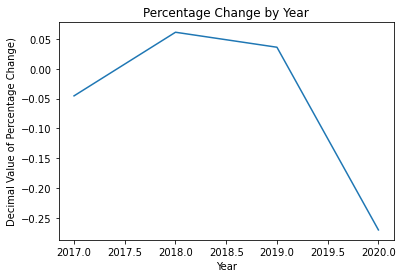

In [10]:
yearGroup = byYear.groupby(byYear["TRANS_DT"].dt.year)["MERCHANDISE_AMT"].count()
change19_20 = (yearGroup[2020] - yearGroup[2019])/yearGroup[2019] * 100
print(f"2019 to 2020 change {change19_20}")
int_years = [2016,2017,2018,2019, 2020]

plt.plot(yearGroup.pct_change().dropna())
plt.title("Percentage Change by Year")
plt.ylabel("Decimal Value of Percentage Change)")
plt.xlabel("Year")
plt.show()

As the above calculation and graph demonstrate there was a significant decrease of 27% from 2019 to 2020. This further supports the hypothesis that COVID-19 significantly affected Government P-Card Spending. The next and final step of the time based analysis will be to check and see if there was a significant decrease right at the onset of the pandemic.

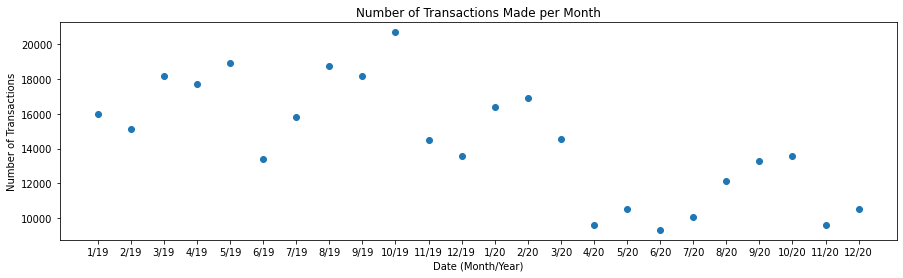

In [11]:
mask = (df["TRANS_DT"].dt.year >= 2019) & (df["TRANS_DT"].dt.year <= 2020)
year_19_20 = df.loc[mask]

month_year = []
for i in range(12):
    i = i + 1
    month_year.append(str(i)+ "/19")
for i in range(12):
    i = i + 1
    month_year.append(str(i)+"/20")
    
f = plt.figure()
f.set_figwidth(15)

byMonthYear = year_19_20.groupby([year_19_20["TRANS_DT"].dt.year, year_19_20["TRANS_DT"].dt.month])
plt.title("Number of Transactions Made per Month")
plt.xlabel("Date (Month/Year)")
plt.ylabel("Number of Transactions")
plt.scatter(month_year,byMonthYear["TRANS_DT"].count().values)
plt.show()

This final scatter plot shows the stark drop off that occurred in number of transactions made right around April of 2020. This of course lines up with the onset of COVID-19 Restrictions in Delaware. With these above pieces of evidence I believe it is a safe assumption to claim that COVID-19 caused a significant decrease in government P-Card spending. This claim is also supported by the fact that one of the main uses for P-Cards is traveling expenses which obviously would have been drastically reduced with people isolating at home.

## Purchase Category Breakdown

The next section of analysis aims to answer the second research question of __What categories do P-Card purchases fall under? What are the general trends of purchases and did COVID-19 have an impact on what was purchased?__ Since the previous analysis established that COVID-19 did affect purchases habits in 2020, I aim to first establish the general trends from all years and then specifically isolate the year 2020 to see how those purchase categories differ. 

### Distribution Analysis

In [71]:
#Used to count the number of instances of each purchase category
unique_list = df["CAT_DESCR"].unique()
item_count = pd.Series(dtype="int64",index = unique_list)
for cat in unique_list:
    item_count[cat] = df["CAT_DESCR"].str.count(cat).sum()
item_count.head()

INTERNAL TRANSACTION                               687
EATING PLACES RESTAURANTS                        10970
LODGING                                           7301
MISCELLANEOUS AND SPECIALTY RETAIL STORES         2275
COMMERCIAL EQUIPMENT NOT ELSEWHERE CLASSIFIED     2506
dtype: int64

In [13]:
#Reading in csv to Series
item_count = pd.read_csv("item_count.csv", index_col = 0, header = None, squeeze=True)
item_count.head()

0
NaN                                              0
INTERNAL TRANSACTION                           687
EATING PLACES RESTAURANTS                    10970
LODGING                                       7301
MISCELLANEOUS AND SPECIALTY RETAIL STORES     2275
Name: 1, dtype: int64

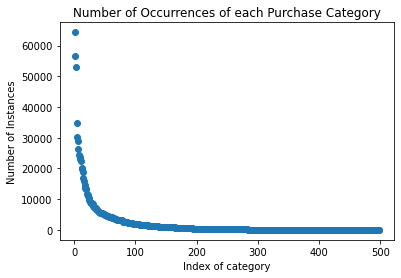

In [14]:
sorted_s = item_count.sort_values(ascending=False)
index_list = list(range(1,len(sorted_s)+1))
plt.scatter(x = index_list, y = sorted_s.values)
plt.title("Number of Occurrences of each Purchase Category")
plt.ylabel("Number of Instances")
plt.xlabel("Index of category")
plt.show()

In [15]:
stats.shapiro(sorted_s.values)

ShapiroResult(statistic=0.35550230741500854, pvalue=1.7529142368110502e-38)

The work above shows us some very interesting things about the purchase classification of p-card spending. Initially looking at the scatter plot it appeared to be logarithmically distributed. Because of this, I ran a Shapiro Wilk test to check for lognormality. Given the resulting p-value to be extremely close to 0 it is fair to assume the Number of Occurrences of Purchase Categories are lognormally distributed. Since this distribution is lognormal then it is right skewed meaning that a small amount of purchase categories contribute to a significant amount of the total purchases. Because of this characteristic, the rest of my analysis will focus on the left end of the distribution, which is the end that makes the most significant contribution to the overall population.

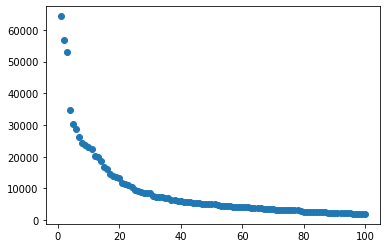

In [16]:
top100 = sorted_s.head(100)
plt.scatter(y = top100.values, x = list(range(1,101)))
plt.show()

### Top Contributor Breakdown

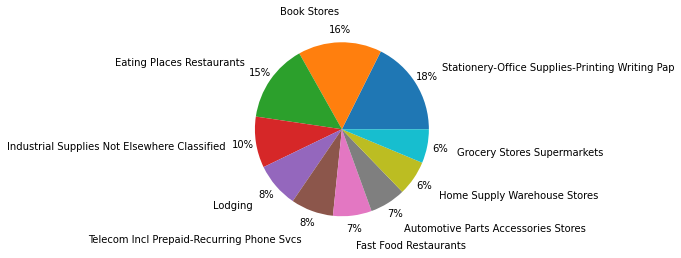

In [17]:
top10 = sorted_s.head(10)

f = plt.figure()
f.set_figwidth(30)
plt.pie(top10.values, labels = top10.index, autopct="%1.0f%%", pctdistance = 1.15, labeldistance = 1.35)
plt.show()

By Looking at the top 10 purchase categories we first see that there are three major categories, Eating Places, Office Supplies, and Book Stores. However it is important to note that in the original data set Amazon.com is classified as a Book Store which I believe accounts for why Book Stores is such a large proportion. Another very interesting factor to consider is that 5 out of the 10 top purchases are commonly associated with travel, those being Eating Places, Lodging, Prepaid Phone Svcs, Fast Food, and Automotive Parts. This leads me to suspect that when just 2020 data is analyzed, these categories might fall off significantly. 

### Affects of COVID-19 on Purchase Breakdown

In [18]:
#Isolating 2020 data
df20 = df[df["TRANS_DT"].dt.year == 2020]
unique_list20 = df20["CAT_DESCR"].unique()
item_count20 = pd.Series(dtype="int64",index = unique_list20)
for cat in unique_list20:
    item_count20[cat] = df20["CAT_DESCR"].str.count(cat).sum()
item_count20.head()

Travel                                                 1179
Advertising Services                                   1431
Book Stores                                           15001
Stationery-Office Supplies-Printing Writing Pap       10753
Direct Marketing-Continuity-Subscription Merchants     2060
dtype: int64

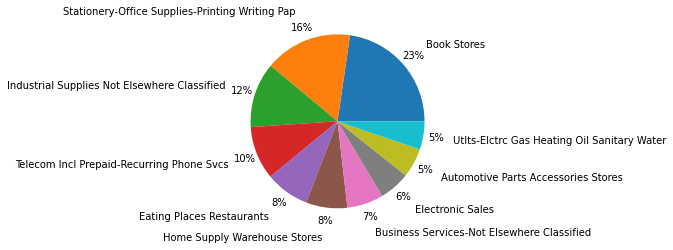

In [19]:
sorted_s20 = item_count20.sort_values(ascending=False)
top10_20 = sorted_s20.head(10)
plt.pie(top10_20,labels=top10_20.index, autopct="%1.0f%%" ,pctdistance = 1.15, labeldistance = 1.35)
plt.show()

Comparing the two above pie charts demonstrates how COVID-19 affected P-Card purchase categories. The most notable difference is that Lodging as been completely removed from the pie chart. Before the onset of the pandemic Lodging account for 8% of the 10 most popular spending categories so its absence from the 2020 data set is very significant. A second noticeable difference is that Fast Food Restaurants also did not make the top 10 spending categories of 2020. The last difference to point out is that restaurants also fell significantly from the all years data set, dropping 7% from 15% to 8%. The other categories mentioned above as possible points of interest appear to have had little to no change.

## By Department Insights

The final section of my analysis will center on what departments are contributing the most to P-Card Spending. The main objective of this section is to answer the final research question __How much money is typically spent per purchase? Do different departments have different means or is it consistent throughout? Did COVID-19 also affect which department are making the most purchases?__ I will start by finding which departments spend the most money using the P-Card system and then compare those departments to each other looking for any significant outliers.

### Department Spending by Sum

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040394 entries, 0 to 1040393
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   FISCAL_YEAR      1040394 non-null  int64         
 1   FISCAL_PERIOD    1040394 non-null  int64         
 2   DEPT_NAME        1040394 non-null  object        
 3   DIV_NAME         1040394 non-null  object        
 4   MERCHANT         1040394 non-null  object        
 5   CAT_DESCR        1040394 non-null  object        
 6   TRANS_DT         1040394 non-null  datetime64[ns]
 7   MERCHANDISE_AMT  1040394 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 63.5+ MB


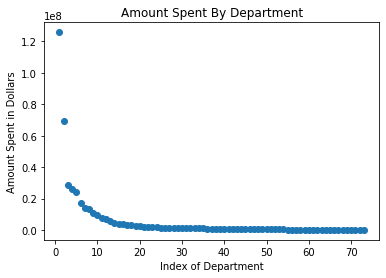

In [28]:
byDeptSum = df.groupby(df["DEPT_NAME"])["MERCHANDISE_AMT"].sum().sort_values(ascending = False)

plt.scatter(y=byDeptSum.values, x = list(range(1,len(byDeptSum)+1)))
plt.title("Amount Spent By Department")
plt.ylabel("Amount Spent in Dollars")
plt.xlabel("Index of Department")
plt.show()

From the scatter plot of the sum of money spent by department we first see two instances, The Department of Corrections and Department of Transportation, are  potential outliers. However, it is also possible that these departments are significantly bigger in personnel size inherently increasing the amount of spending their department accumulates. My next steps will be to compare the mean spending of these two groups against the mean of other departments and the overall group to see if these groups are also outliers in terms of amount spent per purchase.

### Mean Analysis

In [22]:
byDeptMean = df.groupby(df["DEPT_NAME"])["MERCHANDISE_AMT"].mean().sort_values(ascending = False)
byDeptMean.head()

DEPT_NAME
DEPT OF TECHNOLOGY AND INFOR     2588.558486
DEPT OF CORRECTIONS              1172.331701
EXECUTIVE                         629.868419
ACADEMY OF DOVER CHARTER SCHL     559.403043
DEPT OF TRANSPORTATION            494.625242
Name: MERCHANDISE_AMT, dtype: float64

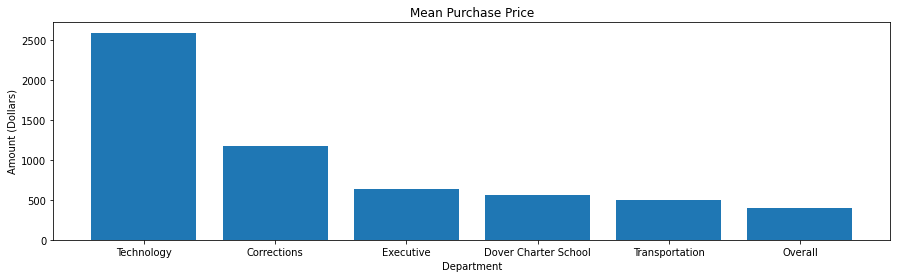

In [23]:
corrections = df[df.DEPT_NAME == "DEPT OF CORRECTIONS"]["MERCHANDISE_AMT"].mean()
transport = df[df.DEPT_NAME == "DEPT OF TRANSPORTATION"]["MERCHANDISE_AMT"].mean()
exe = df[df.DEPT_NAME == "EXECUTIVE"]["MERCHANDISE_AMT"].mean()
dover_charter = df[df.DEPT_NAME == "ACADEMY OF DOVER CHARTER SCHL"]["MERCHANDISE_AMT"].mean()
tech = df[df.DEPT_NAME == "DEPT OF TECHNOLOGY AND INFOR"]["MERCHANDISE_AMT"].mean()
overall = df.MERCHANDISE_AMT.mean()

means = [tech, corrections, exe, dover_charter, transport, overall]
graph_labels = ["Technology", "Corrections", "Executive", "Dover Charter School", "Transportation", "Overall"]

f = plt.figure()
f.set_figwidth(15)
plt.bar(height = means, x = graph_labels)
plt.title("Mean Purchase Price")
plt.ylabel("Amount (Dollars)")
plt.xlabel("Department")
plt.show()

After separating the data by mean of purchase amount, we see that both the Department of Corrections and the Department of Transportation are also in the top 5 for this category as well. Another interesting discovery is that while the Department of Technology is not as significant as an outlier in amount spent, it is significantly larger in price per purchase. Since the difference is so large I suspect there might be large outliers within the Technology Department purchases and my next step will be to identify them to compare against the outliers in the other interesting categories of Corrections and Transportation as well as the overall data set.

### Outlier Analysis

In [33]:
tech_count = df[df.DEPT_NAME == "DEPT OF TECHNOLOGY AND INFOR"]["MERCHANDISE_AMT"].count()
corrections_count = df[df.DEPT_NAME == "DEPT OF CORRECTIONS"]["MERCHANDISE_AMT"].count()
transport_count = df[df.DEPT_NAME == "DEPT OF TRANSPORTATION"]["MERCHANDISE_AMT"].count()
print(f"""
Department of Transportation: {tech_count}
Department of Corrections: {corrections_count}
Department of Transport: {transport_count}
      """)


Department of Transportation: 10080
Department of Corrections: 107360
Department of Transport: 139862
      


In [119]:
def detect_outliers(series):
    series = series[series.between(0, series.max())]

    #Outlier Calculations
    Q1 = np.percentile(series, 25, interpolation = 'midpoint')
    Q3 = np.percentile(series, 75, interpolation = 'midpoint')
    IQR = Q3-Q1
    upper = series >= (Q3+1.5*IQR)
    lower = series <= (Q1-1.5*IQR)

    outlier_sum = upper.sum() + lower.sum()
    print(f"""
    Total Number of Purchases {len(series)}
    Amount of Upper Outliers {upper.sum()}
    Amount of Lower Outliers {lower.sum()}
    Total Number of Outliers {outlier_sum}
    Percentage of Outliers = {round(outlier_sum/len(series) * 100, 2)}%
    """)
    return series

In [128]:
def outlier_hist(series):
    drop_outliers = series[series.between(Q1-1.5*IQR, Q3+1.5*IQR)]
    plt.hist(drop_outliers)
    plt.title("Amount of Purchases by Price Point")
    plt.ylabel("Frequency")
    plt.xlabel("Price")
    plt.show()

__Department of Technology Outliers__


    Total Number of Purchases 9942
    Amount of Upper Outliers 1404
    Amount of Lower Outliers 0
    Total Number of Outliers 1404
    Percentage of Outliers = 14.12%
    


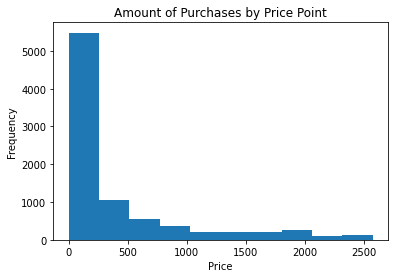

In [129]:
tech_purchases = df[df.DEPT_NAME == "DEPT OF TECHNOLOGY AND INFOR"]["MERCHANDISE_AMT"]
tech_purchases = detect_outliers(tech_purchases)
outlier_hist(tech_purchases)

__Department of Corrections Outliers__


    Total Number of Purchases 105619
    Amount of Upper Outliers 14418
    Amount of Lower Outliers 0
    Total Number of Outliers 14418
    Percentage of Outliers = 13.65%
    


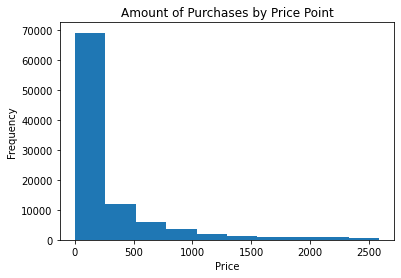

In [130]:
corr_purchases = df[df.DEPT_NAME == "DEPT OF CORRECTIONS"]["MERCHANDISE_AMT"]
corr_purchases = detect_outliers(corr_purchases)
outlier_hist(corr_purchases)

__Department of Transportation__


    Total Number of Purchases 138688
    Amount of Upper Outliers 17618
    Amount of Lower Outliers 0
    Total Number of Outliers 17618
    Percentage of Outliers = 12.7%
    


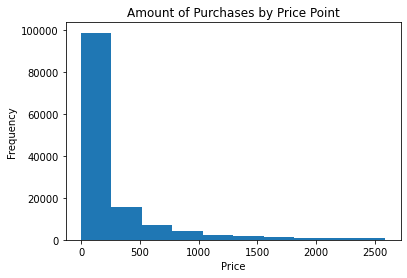

In [131]:
transport_purchases = df[df.DEPT_NAME == "DEPT OF TRANSPORTATION"]["MERCHANDISE_AMT"]
transport_purchases = detect_outliers(transport_purchases)
outlier_hist(transport_purchases)

__Total Dataset__


    Total Number of Purchases 1018345
    Amount of Upper Outliers 122621
    Amount of Lower Outliers 0
    Total Number of Outliers 122621
    Percentage of Outliers = 12.04%
    


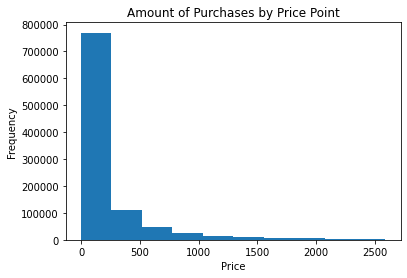

In [132]:
total_purchases = df["MERCHANDISE_AMT"]
total_purchases = detect_outliers(total_purchases)
outlier_hist(total_purchases)

Both the outlier data and the histogram of purchase frequencies for all four groups selected are extremely similar to each other. Because of all 3 major departments similarity to each other and the entire population as a whole we can determine that none of those groups have spending trends that are significantly different. As for the large difference in the mean of the Department of Transportation, I believe that can be attributed to a larger percentage of outliers in its data set as well as having a smaller total amount of purchases. Those two factors when combined can significantly alter a mean. 

### Affects of COVID-19 on By Department Spending

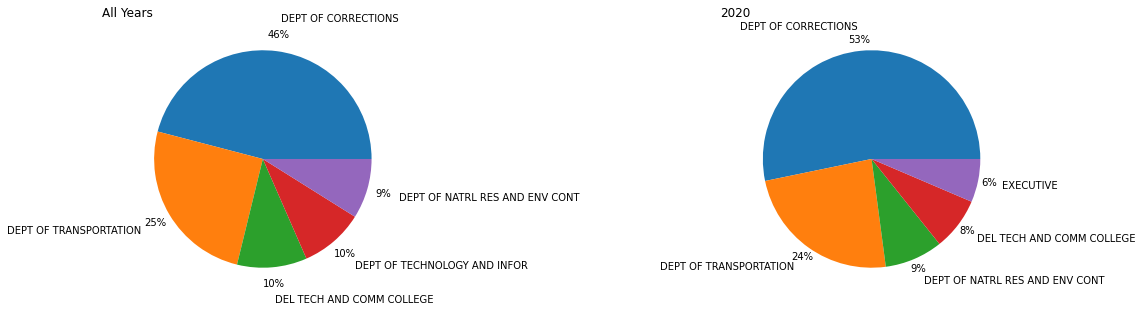

In [184]:
top5Dept = byDeptSum.head()

df20 = df[df["TRANS_DT"].dt.year == 2020]
byDeptSum20 = df20.groupby(df20["DEPT_NAME"])["MERCHANDISE_AMT"].sum().sort_values(ascending = False)
top5Dept20 = byDeptSum20.head()


fig, (all_pie, pie20) = plt.subplots(1,2, figsize = (20,5))
top5Dept = byDeptSum.head()

all_pie.pie(top5Dept.values, labels = top5Dept.index, autopct="%1.0f%%", pctdistance = 1.15, labeldistance = 1.3)
all_pie.title.set_text("All Years")
all_pie.title.set_x(0)
pie20.pie(top5Dept20.values, labels = top5Dept20.index, autopct="%1.0f%%", pctdistance = 1.1, labeldistance = 1.22)
pie20.title.set_text("2020")
pie20.title.set_x(0)
plt.show()

The departments making the most purchases in total versus 2020 seems to be mostly unchanged. The only notable changes are the Department of Natural Resources being replaced by the Executive Department in 2020. The percentages of each department also remain consistent throughout both charts. This leads to the conclusion that although COVID-19 affected the amount being purchased on P-Cards as well as what supplies were being bought, the top departmental contributors remains mostly unchanged.

## Conclusion and Discussion

All the above analysis was created with the intent to paint a clear picture of how P-Card money allocation is being spent for the tax payers supporting the P-Card program. Throughout the analysis I investigated several core questions that are as follows. __How much money did the P-Card Program spend?__ __When was the most P-Card money being spent__ __Who is spending P-Card money?__ __What is P-Card money being spent on?__ In my investigation I found significant impacts of COVID-19 on how much P-Card were being used as well as what the money was being spent on. COVID-19 however did not impact who was spending the most money. I also discovered that the purchase price distribtions of different agencies and the overall total are very similar to each other, with the majority falling under the \$250 range.

## Resources Used

[University of Delaware P-Card Audit](https://www.delawarepublic.org/post/ud-odds-auditors-office-over-procurement-card-audit)